# Prepare TMody2021Ovules data for cellpose

by [Qin Yu](https://github.com/qin-yu), Jun 2022

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from skimage.measure import label, regionprops

Check distribution of diameter size of one volume

29.150199882773542


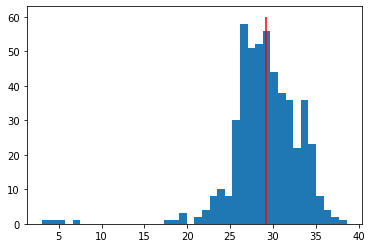

In [2]:
filepath = "/g/kreshuk/yu/Datasets/TMody2021Ovules/train_xyds2/1613.h5"
with h5py.File(filepath, 'r') as f:
    image = f['label'][:]

label_img = label(image)
regions = regionprops(label_img)
areas = np.array([props.area for props in regions])
median_volume = np.median(areas)
median_diam = np.power(3/4 * np.median(areas)/np.pi, 1/3) * 2
print(median_diam)

plt.hist(np.power(3/4 * areas/np.pi, 1/3) * 2, bins=40)
plt.vlines(median_diam, 0, 60, colors='r')

Check all volumes

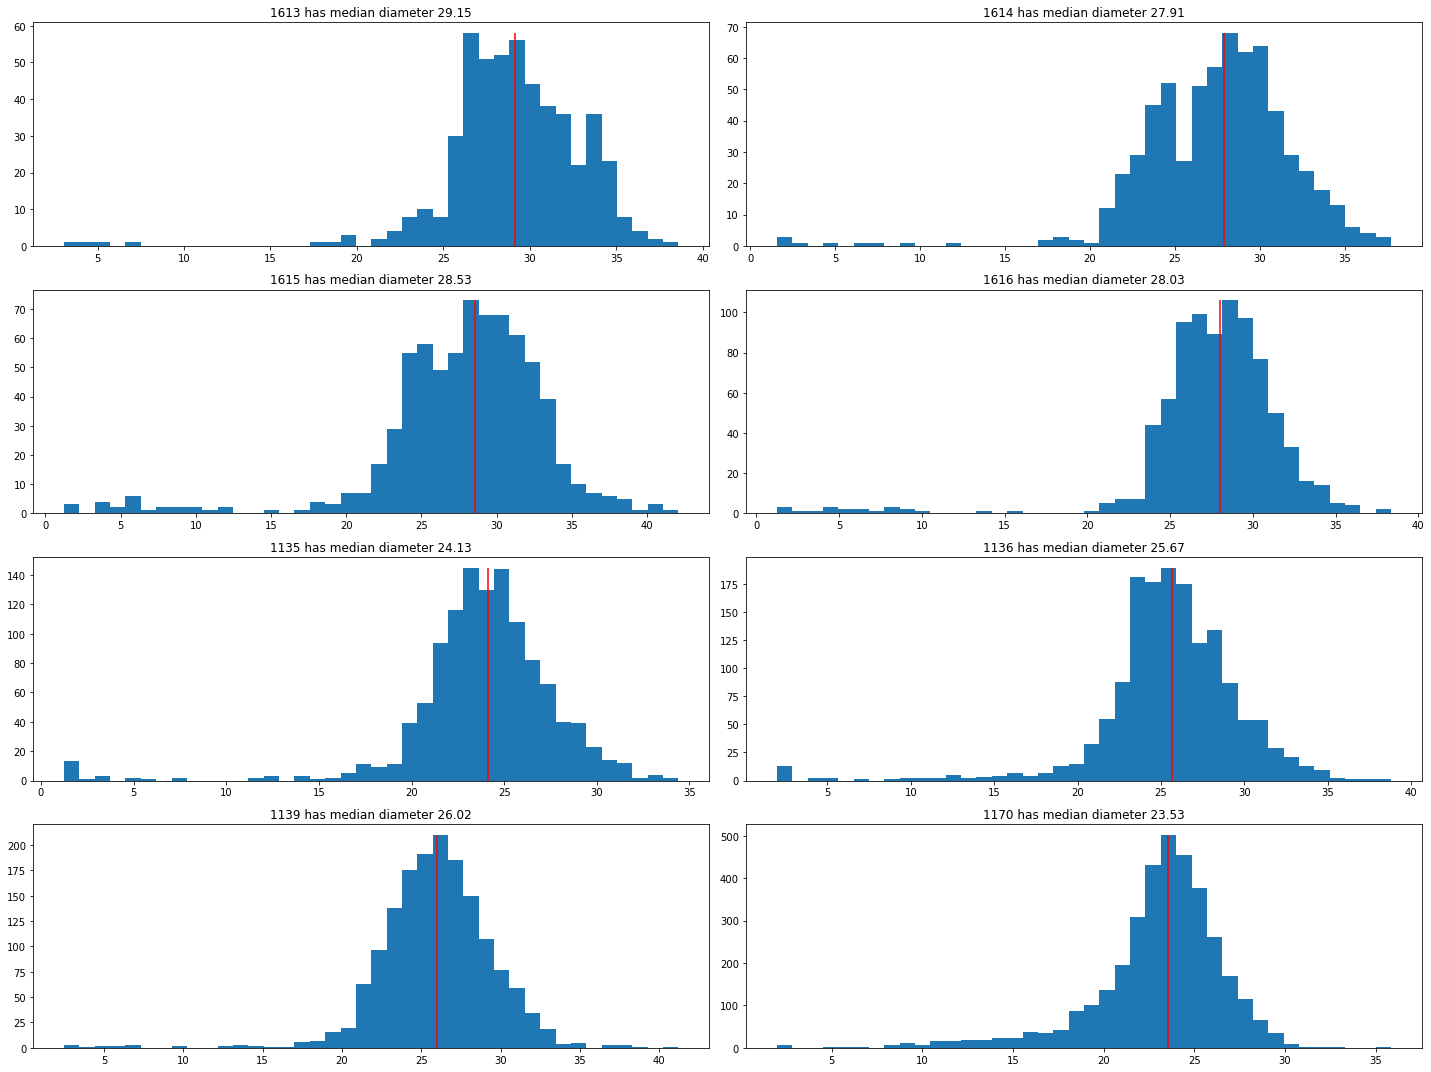

In [3]:
filepath_list = [
    "/g/kreshuk/yu/Datasets/TMody2021Ovules/train_xyds2/1613.h5",
    "/g/kreshuk/yu/Datasets/TMody2021Ovules/train_xyds2/1614.h5",
    "/g/kreshuk/yu/Datasets/TMody2021Ovules/train_xyds2/1615.h5",
    "/g/kreshuk/yu/Datasets/TMody2021Ovules/train_xyds2/1616.h5",
    "/g/kreshuk/yu/Datasets/AVijayan2021Ovules/train_v1/1135.h5",
    "/g/kreshuk/yu/Datasets/AVijayan2021Ovules/train_v1/1136.h5",
    "/g/kreshuk/yu/Datasets/AVijayan2021Ovules/train_v1/1139.h5",
    "/g/kreshuk/yu/Datasets/AVijayan2021Ovules/train_v1/1170.h5"
]

fig, axs = plt.subplots(4, 2, figsize=(20, 15))
axs = axs.flatten()

for filepath, ax in zip(filepath_list, axs):
    with h5py.File(filepath, 'r') as f:
        image = f['label'][:]

    label_img = label(image)
    regions = regionprops(label_img)

    areas = np.array([props.area for props in regions])
    median_volume = np.median(areas)
    median_diam = np.power(3/4 * np.median(areas)/np.pi, 1/3) * 2

    n, _, _ = ax.hist(np.power(3/4 * areas/np.pi, 1/3) * 2, bins=40)
    ax.vlines(median_diam, 0, n.max(), colors='r')
    ax.set_title(f"{Path(filepath).stem} has median diameter {median_diam:2.2f}")

plt.tight_layout()

Check overall distributions

Text(0.5, 1.0, 'overall has median diameter 25.22')

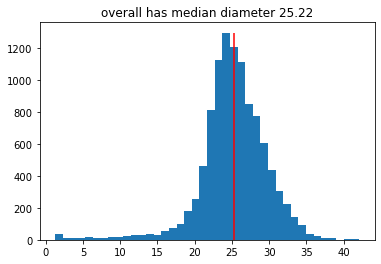

In [4]:
areas = []
for filepath in filepath_list:
    with h5py.File(filepath, 'r') as f:
        image = f['label'][:]

    label_img = label(image)
    regions = regionprops(label_img)

    areas.extend([props.area for props in regions])
areas = np.array(areas)

median_volume = np.median(areas)
median_diam = np.power(3/4 * np.median(areas)/np.pi, 1/3) * 2

n, _, _ = plt.hist(np.power(3/4 * areas/np.pi, 1/3) * 2, bins=40)
plt.vlines(median_diam, 0, n.max(), colors='r')
plt.title(f"overall has median diameter {median_diam:2.2f}")